# Fill That Cart!

# Introduction

Instacart is a grocery delivery platform where customers can place an order and have it delivered, similar to Uber Eats and Door Dash.  
The dataset provided has been modified from the original. We reduced its size to speed up calculations and introduced missing values and duplicates. Care was taken to preserve the original data distributions while making these changes.

You must complete three steps. For each step, write a brief introduction that clearly explains how you intend to solve it, and include explanatory paragraphs to justify your decisions as you progress through the solution. Also, write a conclusion that summarizes your findings and choices.

## Data Dictionary

There are five tables in the dataset, and you will need to use them all for data preprocessing and exploratory data analysis. Below is a data dictionary listing the columns in each table and describing the data they contain.

- `instacart_orders.csv`: Each row corresponds to an order in the Instacart app.
    - `'order_id'`: Unique ID number identifying each order.
    - `'user_id'`: Unique ID number identifying each customer account.
    - `'order_number'`: Number of times this customer has placed an order.
    - `'order_dow'`: Day of the week the order was placed (0 for Sunday).
    - `'order_hour_of_day'`: Hour of the day the order was placed.
    - `'days_since_prior_order'`: Number of days since this customer’s previous order.
- `products.csv`: Each row corresponds to a unique product customers can purchase.
    - `'product_id'`: Unique ID number identifying each product.
    - `'product_name'`: Name of the product.
    - `'aisle_id'`: Unique ID number identifying each grocery aisle category.
    - `'department_id'`: Unique ID number identifying each grocery department.
- `order_products.csv`: Each row corresponds to an item ordered in an order.
    - `'order_id'`: Unique ID number identifying each order.
    - `'product_id'`: Unique ID number identifying each product.
    - `'add_to_cart_order'`: Sequential order in which each item was added to the cart.
    - `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have.
- `aisles.csv`:
    - `'aisle_id'`: Unique ID number identifying each grocery aisle category.
    - `'aisle'`: Name of the aisle.
- `departments.csv`:
    - `'department_id'`: Unique ID number identifying each grocery department.
    - `'department'`: Name of the department.

# Step 1: Data Description

Read the data files (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv`, and `/datasets/order_products.csv`) using `pd.read_csv()` with the appropriate parameters to correctly read the data. Verify the information for each created DataFrame.

## Solution Plan

Write your solution plan for Step 1: Data Description here.

In [2]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# read datasets into DataFrames
df_instacart_orders = pd.read_csv ('/datasets/instacart_orders.csv', sep= ';')
df_products = pd.read_csv ('/datasets/products.csv', sep= ';')
df_aisles = pd.read_csv ('/datasets/aisles.csv', sep= ';')
df_departments = pd.read_csv ('/datasets/departments.csv', sep= ';')
df_order = pd.read_csv ('/datasets/order_products.csv', sep= ';')

In [4]:
# display DataFrame information
df_instacart_orders.info()

display(df_instacart_orders.head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [5]:
# display DataFrame information
df_products.info()

display(df_products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [6]:
# display DataFrame information
df_aisles.info()

display(df_aisles)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
# display DataFrame information
df_departments.info()

display(df_departments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
# display DataFrame information
df_order.info(show_counts=True)

display (df_order)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


## Conclusions

Write here your intermediate conclusions about Step 1. Data Description.

R/ Each DataFrame uses ';' as a delimiter, each column name is written in lowercase and separated by '_'.

1. **df_instacart_orders**
    * The data in this DataFrame consists of integers (1 column) and floats (5 columns), both 64-bit.
    * The column `days_since_prior_order` has 28,819 missing values in total.
    * Contains 6 columns.
    * Has no null values.
    * A total of 478,967 entries.

2. **df_products**
    * Composed of 4 columns.
    * No null or missing values.
    * 3 columns have 64-bit integer values, and 1 column is of string type.
    * A total of 49,694 entries.

3. **df_aisles**
    * Composed of 2 columns.
    * One column is a 64-bit integer, and the other is a string type.
    * No null or missing data.
    * A total of 134 entries.

4. **df_departments**
    * Composed of 2 columns.
    * One column is a 64-bit integer, and the other is a string type.
    * No null or missing data.
    * A total of 21 entries.

5. **df_order**
    * Composed of 4 columns.
    * One column is a 64-bit float, and the other 3 are 64-bit integers.
    * A total of 4,545,007 entries.
    * Contains 836 null or missing values in the column `add_to_cart_order`.

# Step 2. Data Preprocessing

Preprocess the data as follows:

- Check and correct the data types (for example, make sure that ID columns are integers).
- Identify and fill in missing values.
- Identify and remove duplicate values.

Make sure to explain what types of missing and duplicate values you found, how you filled or removed them, and why you used those methods. Why do you think these missing and duplicate values might have been present in the dataset?

## Solution Plan

Write your plan for Step 2. Data Preprocessing here.

R/
- If any column contains invalid data according to its processing (quantitative or categorical), it will be changed to the indicated type.
- I would identify rows containing missing values and fill them.
- I would search for rows that are identical in all columns and, depending on the information they contain and their importance, I would either remove or keep them to avoid affecting the case study.

## Find and remove duplicate values (and describe how you made your decisions).

### `orders` data frame

In [9]:
# Check for duplicate orders
duplicated_orders = df_instacart_orders.duplicated()
print (duplicated_orders.sum())


15


Do you have duplicate rows? If yes, what do they have in common?

A/
- They are explicit duplicates (identical rows), usually generated by the system when 'days_since_prior_order' has missing values.

In [10]:
# Based on your findings,
# Verify all orders made on Wednesday at 2:00 a.m.

Wed_order_2am = df_instacart_orders[(df_instacart_orders['order_dow']== 3)&(df_instacart_orders['order_hour_of_day']== 2)]

display (Wed_order_2am)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


What does this result suggest?

A/ 

For a Wednesday at 2 a.m., this type of purchase is quite unusual. However, it can be inferred that the type of buyer has a specific food purchasing schedule due to external conditions, such as work.

In [11]:
# Remove duplicate orders
duplicated_orders_droped= df_instacart_orders.drop_duplicates()

In [12]:
# Recheck for duplicate rows
duplicated_orders_droped.duplicated().sum()

0

In [13]:
# Recheck only for duplicate order IDs

duplicated_id_products = duplicated_orders_droped['order_id'].duplicated().sum()
print(f"El número de IDs duplicados de pedidos en duplicated_orders_droped: {duplicated_id_products}")

El número de IDs duplicados de pedidos en duplicated_orders_droped: 0


Briefly describe your findings and what you did with them

A/
* Duplicate values are identified, their criticality is evaluated, and the root cause of their origin is determined.
* They are removed as they are explicit values.
* The operation is validated both in the filtered dataframe by the given day and time, and by order ID.
* We analyze the impact of orders placed at an unusual time.

### `products` data frame

In [14]:
# Check for completely duplicate rows

# Verify if there are completely duplicate rows
duplicated_rows = df_products.duplicated().sum()

# Print the result
print(f"El número de filas totalmente duplicadas en products es: {duplicated_rows}")


El número de filas totalmente duplicadas en products es: 0


In [15]:
# Check only for duplicate department IDs

# Verify if there are duplicate department IDs in department_id
duplicated_id_departments = df_products['department_id'].duplicated().sum()

# Print the result
print(f"El número de ID de departamentos duplicados en products es: {duplicated_id_departments}")

El número de ID de departamentos duplicados en products es: 49673


In [16]:
# Check only for duplicate product names (convert the names to uppercase to compare them better)

# Convert product names to uppercase using the upper method and as string with str
df_products['product_name'] = df_products['product_name'].str.upper()

# Print the result to verify if the operation was performed
print(df_products['product_name'])
print()

# Check for duplicate values in the 'product_name' column and print
df_products_duplicated = df_products['product_name'].duplicated().sum()
print(f"La cantidad de nombres duplicados de productos en el dataframe products es: {df_products_duplicated}")

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object

La cantidad de nombres duplicados de productos en el dataframe products es: 1361


In [17]:
# Check if there are duplicate product names that are not missing

# Remove rows with missing values in the product_name column
products_no_NAN = df_products.dropna(subset=['product_name'])

# Recheck for duplicate product names
product_names_duplicated = products_no_NAN['product_name'].duplicated().sum()

print(f"Número de nombres duplicados de productos no faltantes en products: {product_names_duplicated}")


Número de nombres duplicados de productos no faltantes en products: 104


Briefly describe your findings and what you did with them.

A/

* By observing the product names in the `products` DataFrame, it is evident that there are no duplicate product names that are not missing. I used the `dropna()` function to remove rows with missing values in the `product_name` column, ensuring that only products with valid names are considered when identifying duplicates. Then, I used the `duplicated()` function to check if there were any duplicate product names in the cleaned dataset.

* 104 duplicate products in non-missing values.

### `departments` data frame

In [18]:
# Check for completely duplicate rows

# Verify if there are completely duplicate rows
rows_duplicated = df_departments.duplicated().sum()

# Print the result
print(f"Número de filas totalmente duplicadas: {rows_duplicated}")

Número de filas totalmente duplicadas: 0


In [19]:
# Check only for duplicate product IDs

# Verify if there are duplicate department IDs in department_id
products_id_duplicated= df_departments['department_id'].duplicated().sum()

# Print the result
print (f"Número de IDs duplicados de productos: {products_id_duplicated}")

Número de IDs duplicados de productos: 0


Briefly describe your findings and what you did with them.

A/
* After reviewing the `products` DataFrame, I found that there are no duplicate product IDs. I used the `duplicated()` function applied to the `product_id` column to identify any duplicate IDs and then counted the number of duplicated IDs.

* Not finding any duplicate product IDs, I confirmed that each product ID is unique in the dataset.

### `aisles` data frame

In [20]:
# Check for completely duplicate rows

# Verify if there are duplicate IDs in aisles
duplicated_ailes_rows = df_aisles.duplicated().sum()

# Print the result
print(f"El número de filas totalmente duplicadas en ailes es: {duplicated_ailes_rows}")

El número de filas totalmente duplicadas en ailes es: 0


In [21]:
# Check only for duplicate product IDs

# Verify if there are duplicate product IDs in aisles_id
duplicated_id_produc_aisles = df_aisles['aisle_id'].duplicated().sum()

# Print the result
print(f"El número de ID IDs duplicadas de productos en aisles es: {duplicated_id_produc_aisles}")



El número de ID IDs duplicadas de productos en aisles es: 0


Briefly describe your findings and what you did with them.

R/
* There are no duplicate values.
* The duplicated() method was applied along with sum() on both the dataframe and the aisle ID, considering the latter as the product since this dataframe consists only of two columns: the ID and the aisle.
* Upon not finding duplicate aisle IDs, I confirmed that each aisle ID is unique in the dataset.

### `order_products` data frame

In [22]:
# Check for completely duplicate rows

# Verify if there are completely duplicate rows in the order
duplicated_order_products = df_order.duplicated().sum()

# Print the result
print(f"El número de filas totalmente duplicadas en order es: {duplicated_order_products}")

El número de filas totalmente duplicadas en order es: 0


In [23]:
# Recheck if there are any other misleading duplicates

# Verify if there are duplicates in the order
duplicated_order_prod = df_order.duplicated().sum()

# Print the result
print(f"El número de duplicadas en order es: {duplicated_order_prod}")


El número de duplicadas en order es: 0


Briefly describe your findings and what you did with them.

A/ 
* As a result, it indicates that the `order_products` DataFrame is clean of duplicates, ensuring data integrity.

## Find and eliminate missing values

While working with duplicate values, we also noticed that we need to investigate missing values:

* The `'product_name'` column in the `products` table.
* The `'days_since_prior_order'` column in the `orders` table.
* The `'add_to_cart_order'` column in the `order_products` table.


### `products` data frame

In [24]:
# Find missing values in the 'product_name' column

products_NaN = df_products['product_name'].isna().sum()

print(f"Se encontraron {products_NaN} valores ausentes en la columna 'product_name' del DataFrame 'products'.")


Se encontraron 1258 valores ausentes en la columna 'product_name' del DataFrame 'products'.


Briefly describe your findings.

R /
 * There are 1258 missing values, which could lead to misinterpretation when analyzing the data.

In [25]:
# Are all missing product names related to aisle with ID 100?
df_products_ID_100 = df_products[df_products['aisle_id'] == 100]

# Check for missing values in the 'product_name' column of the filtered DataFrame
df_product_NaN_aisle_100 = df_products_ID_100['product_name'].isna().sum()


if df_product_NaN_aisle_100 == products_NaN:
    print ("Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.")
else:
    print("No todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.")


Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.


Briefly describe your findings.

A/

* Each of the missing values is directly related to ID 100.

In [26]:
# Are all missing product names related to department with ID 21?
df_products_id_21 = df_products[df_products['department_id'] == 21]

# Validate if there are missing values in the 'product_name' column of the filtered DataFrame
df_products_NaN_id_21 = df_products_id_21['product_name'].isna().sum()

if df_products_NaN_id_21 == products_NaN:
    print ("Todos los nombres de productos ausentes están relacionados con el departamento con ID 21.")
else:
    print("No todos los nombres de productos ausentes están relacionados con el departamento con ID 21.")

Todos los nombres de productos ausentes están relacionados con el departamento con ID 21.


Briefly describe your findings.

A/
* Each of the missing values is directly related, which is limited to the department with ID 21.

In [27]:
# Use the department and aisle tables to check data for aisle with ID 100 and department with ID 21.

df_product_id_aisle_100 = df_products.merge(df_aisles,on='aisle_id',how='left')

df_product_id_department_21 = df_products.merge(df_departments,on='department_id',how='left')


df_product_id_aisle_100_filtered = df_product_id_aisle_100 [df_product_id_aisle_100['aisle_id']== 100]

df_product_id_department_21_filtered = df_product_id_department_21 [df_product_id_department_21['department_id']== 21]

print ("Datos del aisle id 100 son:")
display (df_product_id_aisle_100_filtered)
print('--------------------------------')
print ("Datos del department con id 21 son:")
display (df_product_id_department_21_filtered)

Datos del aisle id 100 son:


,product_id,product_name,aisle_id,department_id,aisle
37,38,NaN,100,21,missing
71,72,NaN,100,21,missing
109,110,NaN,100,21,missing
296,297,NaN,100,21,missing
416,417,NaN,100,21,missing
...,...,...,...,...,...
49552,49553,NaN,100,21,missing
49574,49575,NaN,100,21,missing
49640,49641,NaN,100,21,missing
49663,49664,NaN,100,21,missing


--------------------------------
Datos del department con id 21 son:


,product_id,product_name,aisle_id,department_id,department
37,38,NaN,100,21,missing
71,72,NaN,100,21,missing
109,110,NaN,100,21,missing
296,297,NaN,100,21,missing
416,417,NaN,100,21,missing
...,...,...,...,...,...
49552,49553,NaN,100,21,missing
49574,49575,NaN,100,21,missing
49640,49641,NaN,100,21,missing
49663,49664,NaN,100,21,missing


Briefly describe your findings.

In [28]:
# Complete missing product names with 'Unknown'

# Perform the filling of missing names
df_products['product_name'].fillna('Unknown', inplace=True)

# Validate if the operation was done using the isna() method in combination with sum()
df_products_Ausentes = df_products['product_name'].isna().sum()

# Print the result
print(df_products_Ausentes)


0


Briefly describe your findings and what you did with them.

A/

* Completing the missing values allows us to have a more readable dataframe for interpretation.

### `orders` data frame

In [29]:
# Find missing values

df_orders_nan = df_instacart_orders.isna().sum()

print(df_orders_nan)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [30]:
# Are there any missing values that aren't the first customer order?

df_order_nan_dif = df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isna()) & (df_instacart_orders['order_number']!=1)]


print(f"Se encontraron: {df_order ['add_to_cart_order'].isna().sum()} valores ausentes que no son el primer pedido del cliente")


Se encontraron: 836 valores ausentes que no son el primer pedido del cliente


Briefly describe your findings and what you did with them.

### `order_products` data frame

In [31]:
# Find missing values

df_orders_products_nan = df_order.isna().sum()

print(df_orders_products_nan)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# What are the minimum and maximum values in this column?

df_orders_products_min = df_order['add_to_cart_order'].min()

df_orders_products_max = df_order['add_to_cart_order'].max()

print(f"Valor minimo: {df_orders_products_min}")
print(f"Valor minimo: {df_orders_products_max}")

Valor minimo: 1.0
Valor minimo: 64.0


Briefly describe your findings.

A/ 
* When evaluating the order dataframe, missing values are found in the add_to_cart_order column.
* The minimum value tells us that 1 is the first item added to the cart, while 64 indicates the maximum value added.

In [33]:
# Save all order IDs with a missing value in 'add_to_cart_order'

# Filter out missing values in the 'add_to_cart_order' column by assigning them to a variable
add_to_cart_order_nan = df_order[df_order['add_to_cart_order'].isna()]

# Store the order IDs that correspond to the missing values in 'add_to_cart_order' in a variable
df_add_to_cart_order_nan = add_to_cart_order_nan['order_id'].unique()

# Print the result
print (f"IDs de pedidos con un valor ausente en 'add_to_cart_order'son :")
print()
print(df_add_to_cart_order_nan)

IDs de pedidos con un valor ausente en 'add_to_cart_order'son :

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [34]:
# Do all orders with missing values have more than 64 products?
# Group all orders with missing data by their order ID.
# Count the number of 'product_id' in each order and check the minimum count value.

# Group all orders with missing data by 'order_id' and count the number of 'product_id' in each order
df_add_to_cart_order_nan_grouped = add_to_cart_order_nan.groupby('order_id').size()

# Check the minimum count value of 'product_id' in orders with missing data
min_id_products_count_nan = df_add_to_cart_order_nan_grouped.min()

# Verify if any order has fewer than 64 products
if min_id_products_count_nan < 64:
    print(f"Sí, al menos un pedido con datos ausentes tiene menos de 64 productos. Contando con un valor min de: {min_id_products_count_nan}")
else:
    print(f"No, todos los pedidos con datos ausentes tienen al menos 64 productos. Contando con un valor min de: {min_id_products_count_nan}")



Sí, al menos un pedido con datos ausentes tiene menos de 64 productos. Contando con un valor min de: 1


Briefly describe your findings.

A/
* For the analysis, we used size() since it returns the total number of elements in each group, including NaN elements. On the other hand, count() returns the number of non-null elements in each group, and in this case, we will evaluate null values.

In [35]:
# Replace missing values in the 'add_to_cart' column with 999 and convert the column to integer type.

# Replace missing values in 'add_to_cart' with 999 using fillna()
df_order['add_to_cart_order'].fillna(999, inplace=True)

# Convert the 'add_to_cart_order' column to integer type using astype()
df_order['add_to_cart_order'] = df_order['add_to_cart_order'].astype(int)

# Verify the operation on each column

print(f"Valores ausentes en la columna 'add_to_cart_order' : {df_order['add_to_cart_order'].isna().sum()}")
print('-----------------------------------------------')
print(df_order.info())

Valores ausentes en la columna 'add_to_cart_order' : 0
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


### Briefly describe your findings and what you did with them.

A/

* Missing values were replaced with the given value.
* The column was converted to integer values for further analysis if a mathematical operation is required.
* We verified if the changes were made successfully.
* Executing each of these actions does not guarantee a more reliable database for manipulation and analysis.

A/

* It could be considered unusual since it is expected that customers do not make such large purchases frequently.

## Conclusions

Write your intermediate conclusions about Step 2: Data Preprocessing.

A/

* Various preprocessing tasks were executed, such as cleaning missing and duplicate values.
* Missing and Duplicate Value Cleaning: Values in columns were adjusted according to the content, missing values were completed, and finally, the data's accuracy was verified.

# Step 3. Data Analysis

Once the data is processed and ready, perform the following analysis:

# [A] Easy (all must be completed to pass)

1. Verify that the values in the columns `'order_hour_of_day'` and `'order_dow'` in the orders table are reasonable (i.e., `'order_hour_of_day'` should range from 0 to 23, and `'order_dow'` should range from 0 to 6).
2. Create a plot showing the number of people placing orders depending on the hour of the day.
3. Create a plot showing which day of the week people are making their purchases.
4. Create a plot showing the time people wait before placing their next order, and comment on the minimum and maximum values.


In [36]:
# Verify 'order_hour_of_day' (0 to 23)

unique_order_hours_of_day = df_instacart_orders['order_hour_of_day'].unique()
valid_order_hour_of_day= (unique_order_hours_of_day >= 0) & (unique_order_hours_of_day <= 23)
print("Valores únicos en 'order_hour_of_day':", unique_order_hours_of_day)
print("¿Todos los valores en 'order_hour_of_day' son razonables?", valid_order_hour_of_day.all())

# Verify 'order_dow' (0 to 6)
unique_order_dow = df_instacart_orders['order_dow'].unique()
valid_order_dow = (unique_order_dow >= 0) & (unique_order_dow <= 6)
print("Valores únicos en 'order_dow':", unique_order_dow)
print("¿Todos los valores en 'order_dow' son razonables?", valid_order_dow.all())

Valores únicos en 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
¿Todos los valores en 'order_hour_of_day' son razonables? True
Valores únicos en 'order_dow': [6 5 0 4 3 1 2]
¿Todos los valores en 'order_dow' son razonables? True


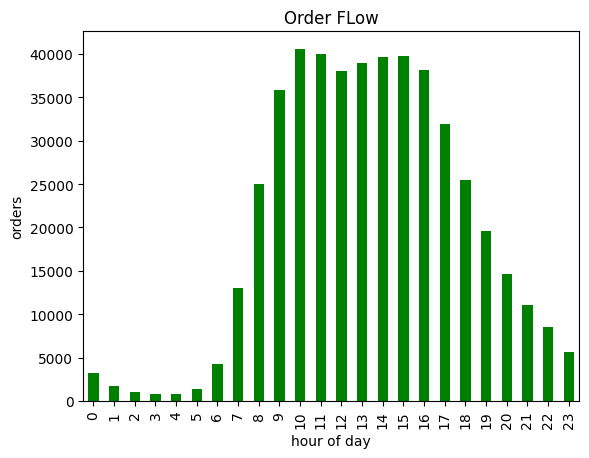

In [37]:

# Count the number of orders in each hour of the day using count() and assigning an index to separate the columns for the axes of the chart
df_hourly_orders = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count().reset_index(name='order_count')


# Set up the chart and assign values to display 
df_hourly_orders.plot (x='order_hour_of_day',
                   y='order_count',
                   kind='bar',
                   title='Order FLow',
                   xlabel='hour of day',
                   ylabel='orders',
                   legend=False,
                   color='green'
                   )
# Plot the graph
plt.show()



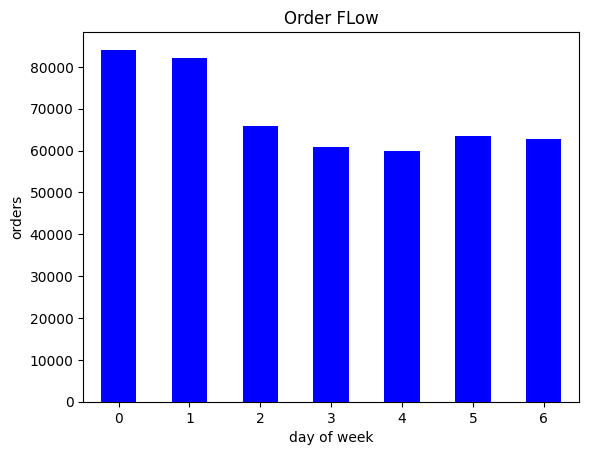

In [38]:
# Count the number of orders by day using count() and assigning an index to separate the columns for the axes of the chart
df_daily_orders = df_instacart_orders.groupby('order_dow')['order_id'].count().reset_index(name='order_count')

# Set up the chart and assign values to display
df_daily_orders.plot (x='order_dow',
                   y='order_count',
                   kind='bar',
                   title='Order FLow',
                   xlabel='day of week',
                   ylabel='orders',
                   rot=0,
                   legend=False,
                   color='blue',                   
                   )
# Plot the graph
plt.show()


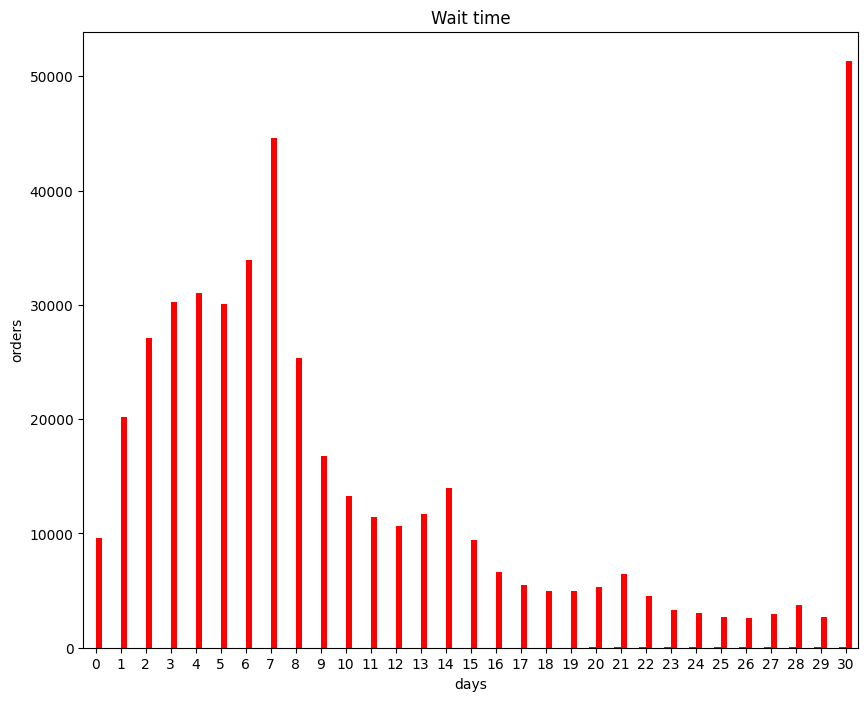

In [39]:
# Count the number of orders by days since the previous order
days_since_order = df_instacart_orders['days_since_prior_order'].value_counts().sort_index()

# Create a dictionary to assign a name to each data row with indexes and values
data = {
    'days_since_prior_order': days_since_order.index,
    'counts': days_since_order.values
}

# Create the DataFrame
df_daily_orders= pd.DataFrame(data)

# Set up the chart and assign values to display
df_daily_orders.plot (
                   kind='bar',
                   title='Wait time',
                   xlabel='days',
                   ylabel='orders',
                   rot=0,
                   legend=False,
                   color='red',
                   figsize=[10,8]
                   )
# Plot the graph
plt.show()



### [A1] Verify that the values are sensitive

In [40]:
# When talking about sensitive values in the 'order_hour_of_day' and 'order_dow' columns, it means that the values are within the expected range and are consistent with what we expect for those columns.

# Check unique values in 'order_hour_of_day' and 'order_dow'
unique_hours =  df_instacart_orders['order_hour_of_day'].unique()

# Evaluate if there are values outside the expected range
hours_out_of_range = max(unique_hours) > 23 or min(unique_hours) < 0

if hours_out_of_range:
    print("Hay valores fuera del rango esperado en 'order_hour_of_day'.")
else:
    print("Los valores en 'order_hour_of_day' son sensibles.")

NameError: name 'dow_out_of_range' is not defined

In [ ]:
# When talking about sensitive values in the 'order_hour_of_day' and 'order_dow' columns, it means that the values are within the expected range and are consistent with what we expect for those columns.

# Check unique values in 'order_hour_of_day' and 'order_dow'
unique_dow =  df_instacart_orders['order_dow'].unique()

# Evaluate if there are values outside the expected range
hours_out_of_range = max(unique_hours) > 23 or min(unique_hours) < 0
dow_out_of_range = max(unique_dow) > 6 or min(unique_dow) < 0

if dow_out_of_range:
    print("Hay valores fuera del rango esperado en 'order_dow'.")
else:
    print("Los valores en 'order_dow' son sensibles.")

Write your conclusions here

R / The values of each analyzed variable are in accordance with what was expected.

### [A2] For each hour of the day, how many people place orders?


In [ ]:
# Group data by 'order_hour_of_day' and count the number of orders in each hour
orders_per_hour = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count()

# Print the result
print(orders_per_hour)

Write your conclusions here

A/

* We observe that a large part of the orders are placed within a preferred time window, but purchases are made throughout the 24 hours.

### [A3] On which day of the week do people buy groceries?

In [42]:
# Group data by 'order_hour_of_day' and count the number of orders in each hour
orders_per_day = df_instacart_orders.groupby('order_dow')['order_id'].count()

# Print the result
print(orders_per_day)


order_dow
0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


Write your conclusions here

A/ 
* There is a slight variation of two days compared to the others, with Sunday and Monday being the days with the highest influx for purchasing groceries.

### [A4] How long do people wait before placing another order? Comment on the minimum and maximum values.

In [43]:
# Use the describe() method to explore the statistics
order_wait_stats = df_instacart_orders['days_since_prior_order'].describe()

# Print the result
print(order_wait_stats)

count    450148.000000
mean         11.101751
std           9.189975
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


Write your conclusions here

R/

* According to what has been observed, there are interesting patterns in the distribution of orders throughout the day and week. Additionally, the waiting time between orders was examined, considering both the minimum and maximum values to understand customer purchasing habits.

# [B] Intermediate (all must be completed to pass)

1. Is there any difference between the distributions of `'order_hour_of_day'` on Wednesdays and Saturdays? Plot bar charts of `'order_hour_of_day'` for both days on the same figure and describe any differences you observe.
2. Plot the distribution of the number of orders made by customers (i.e., how many customers made only 1 order, how many made 2, how many made 3, and so on...).
3. What are the top 20 most frequently ordered products (show their identification and name)?

### [B1] Difference between Wednesdays and Saturdays for `'order_hour_of_day'`. Plot bar charts for both days and describe the differences you see.

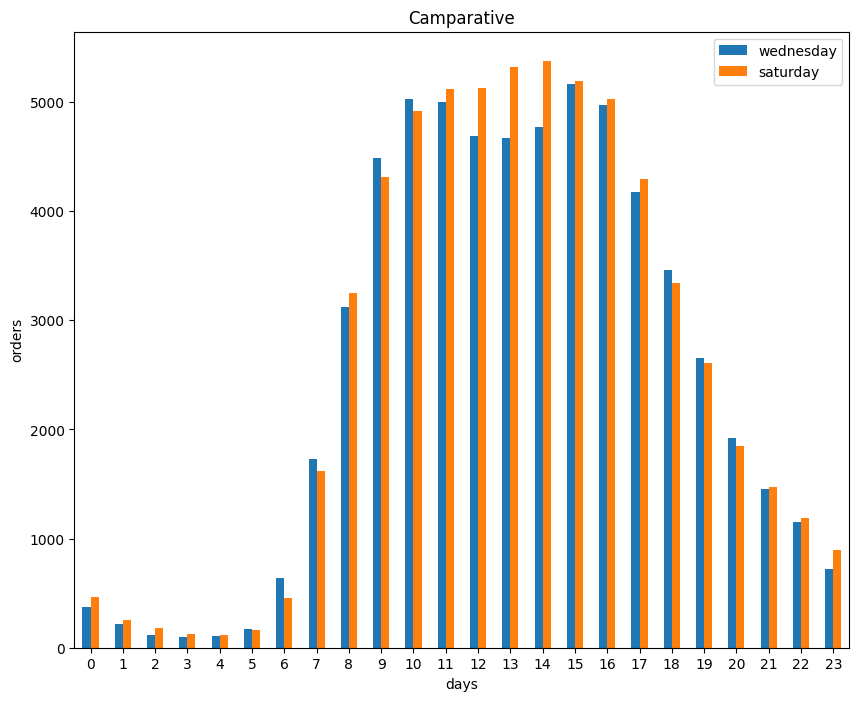

In [44]:
# Filter the data for records where 3 represents Wednesday
orders_wednesday = df_instacart_orders[df_instacart_orders['order_dow'] == 3]  

# Filter the data for records where 6 represents Saturday
orders_saturday = df_instacart_orders[df_instacart_orders['order_dow'] == 6]  

# Count the number of orders for each hour of the day for Wednesdays and Saturdays
hourly_orders_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()
hourly_orders_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

# Convert the series into DataFrames with one column
hourly_orders_wednesday_df = pd.DataFrame(hourly_orders_wednesday).reset_index()
hourly_orders_saturday_df = pd.DataFrame(hourly_orders_saturday).reset_index()

# Rename the columns to make merging easier
hourly_orders_wednesday_df.columns = ['hour_of_day', 'wednesday']
hourly_orders_saturday_df.columns = ['hour_of_day', 'saturday']

# Merge the DataFrames by index (hour_of_day)
merged_hourly_orders = pd.merge(hourly_orders_wednesday_df, hourly_orders_saturday_df, on='hour_of_day', how='outer')

# Sort the data by hour of the day
merged_hourly_orders = merged_hourly_orders.sort_values('hour_of_day')


cols= ['wednesday','saturday']

# Set up the chart and assign values to display
merged_hourly_orders.plot (
                   x='hour_of_day',
                   y=cols,          
                   kind='bar',
                   title='Camparative',
                   xlabel='days',
                   ylabel='orders',
                   rot=0,
                   legend=True,
                   figsize=[10,8]
                   )
# Plot the graph
plt.show()

Write your conclusions here
* Wednesdays are the days with the highest traffic, indicating a higher purchasing preference compared to Saturdays.
* The peak order flow occurs between 7 AM and 7 PM, regardless of the day, whether it's Wednesday or Saturday, indicating consistency throughout the week.
* Similarly, we can observe that there are purchasing preferences during non-typical hours, from 9 PM to 5 AM.

### [B2] What is the distribution of orders per customer?

In [45]:
# Count the number of orders per customer using count on a specific column
orders_per_user = df_instacart_orders.groupby('user_id')['order_id'].count().reset_index(name='order_count')

# Calculate descriptive statistics for the number of orders per customer
order_count_stats = orders_per_user['order_count'].describe()


print(order_count_stats)


count    157437.000000
mean          3.042277
std           2.746990
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_count, dtype: float64


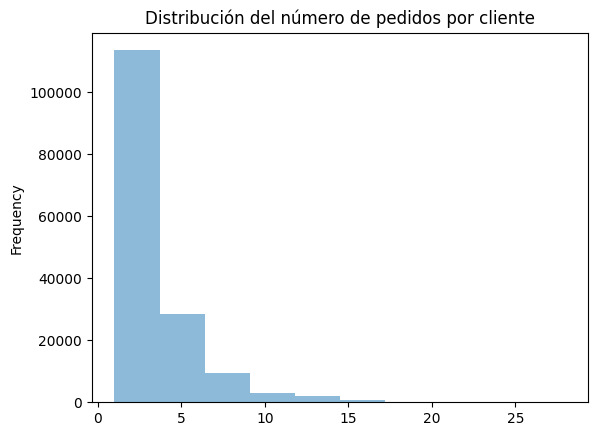

In [46]:
# Set up the chart (histogram) and assign values to display
orders_per_user['order_count'].plot(
                                     kind='hist',
                                     bins= 10,
                                     title= 'Distribución del número de pedidos por cliente',
                                     alpha =0.5
                                    )
# Show the chart
plt.show()


Write your conclusions here

A/

*When interpreting the results, we found that most customers place a low number of orders, while a small percentage of customers place many orders.

### [B3] What are the 20 most popular products (show their ID and name)?

In [47]:
# Count the number of times each product has been ordered using the 'df_order' dataframe
product_counts = df_order['product_id'].value_counts().reset_index()

# Assign names to the columns
product_counts.columns = ['product_id', 'order_count']

# Join the data with the products table to get the product names
product_popularity = product_counts.merge(df_products[['product_id', 'product_name']], on='product_id')

# Select the top 20
top_20_products = product_popularity.head(20)

# Print the result
display(top_20_products[['product_id', 'product_name','order_count']])


,product_id,product_name,order_count
0,24852,BANANA,66050
1,13176,BAG OF ORGANIC BANANAS,53297
2,21137,ORGANIC STRAWBERRIES,37039
3,21903,ORGANIC BABY SPINACH,33971
4,47209,ORGANIC HASS AVOCADO,29773
5,47766,ORGANIC AVOCADO,24689
6,47626,LARGE LEMON,21495
7,16797,STRAWBERRIES,20018
8,26209,LIMES,19690
9,27845,ORGANIC WHOLE MILK,19600


Write your conclusions here

R / 
* As a first impression, we see that these are essential products with a tendency toward organic fruits and vegetables, with some slight variations.

# [C] Difficult (must be completed in order to pass)

1. How many items do people usually purchase in an order? What is the distribution like?
2. What are the top 20 items that are reordered most frequently (show their names and product IDs)?
3. For each product, what is the reorder rate (number of reorders/total orders)?
4. For each customer, what proportion of the products they ordered had already been ordered before? Calculate the reorder rate for each user instead of for each product.
5. What are the top 20 items that people add first to their carts (show the product IDs, their names, and the number of times they were the first item added to the cart)?

### [C1] How many items do people usually purchase in an order? What is the distribution like?

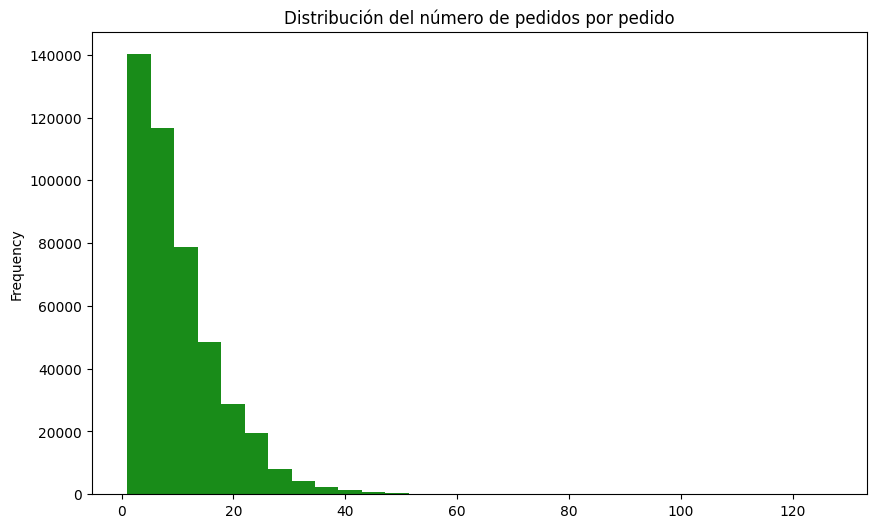

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: items_count, dtype: float64


In [48]:
# Count the number of items per order using count(), reset the index and assign the column name 'items_count'
items_per_order = df_order.groupby('order_id')['product_id'].count().reset_index(name='items_count')

# Set up the chart (histogram) and assign values to display
items_per_order['items_count'].plot(
                                     kind='hist',
                                     bins= 30,
                                     title= 'Distribución del número de pedidos por pedido',
                                     alpha =0.9,
                                     color='green',
                                     figsize=(10,6)
                                    )
# Show the chart
plt.show()

# Review descriptive statistics for the number of items per order
items_count_stats = items_per_order['items_count'].describe()
print(items_count_stats)


Write your conclusions here

A/
* Interpreting the diagram, we can conclude that a large portion of the customers make 1 purchase on their first order, which decreases as they make more.

### [C2] What are the 20 most frequently reordered items (show their names and product IDs)?

In [49]:
# Count the frequency of products that have been reordered and reset the index
reordered_products_count = df_order[df_order['reordered'] == 1]['product_id'].value_counts().reset_index()

# Join 'reordered_products_count' and 'df_products' since they share the common id to add the product name
top_reordered_products = reordered_products_count.merge(df_products[['product_id', 'product_name']], on='product_id')

# Rename the columns 
top_reordered_products=top_reordered_products.rename(columns={'product_id': 'Product ID', 'product_name': 'Product Name'})

# Show the top 20 products that are reordered most frequently
top_20_reordered_products = top_reordered_products.head(20)

display(top_20_reordered_products)

,index,Product ID,Product Name
0,13176,44450,ALLIUM CEPA 30 C
1,21137,28639,EXOTIC PAPAYA & HIBISCUS FLOWER SCENTED OIL RE...
2,21903,26233,ORGANIC EINKORN GINGER SPICE COOKIES
3,47209,23629,RISERVA BALSAMIC VINEGAR & CARAMELIZED ONIONS ...
4,47766,18743,DARK CHOCOLATE CHEESECAKE SOFT DESSERT COOKIES
5,27845,16251,DOUBLE CREAM CREMONT
6,47626,15044,QUARK SEA SALT CARAMEL
7,27966,14748,SOFT WHITE 200 WATTS GENERAL PURPOSE LIGHT BULB
8,16797,13945,2 IN 1 WHITENING TOOTHPASTE
9,26209,13327,100% COLOMBIAN MEDIUM COFFEE


Write your conclusions here

A/

* The products that are ordered most frequently may be related to the most popular products.
* The number of times customers order these products indicates high customer loyalty. To increase sales and customer retention, these products could receive special emphasis in promotional and advertising campaigns.
* For inventory management, it is essential to know which products are ordered most frequently.

In conclusion, the top 20 most frequently ordered items reflect customer preferences and are crucial for customer satisfaction, retention, and overall business success.

### [C3] For each product, what is the ratio of times it is ordered and reordered?

In [50]:
# Calculate the frequency of each product ordered at least once, counting how many times each unique value appears in the 'product_id' column.
product_order_count = df_order['product_id'].value_counts()

# Calculate the frequency of each product that has been reordered, filter the 'df_order' dataframe to include only rows where the 'reordered' column is equal to 1 (indicating that the product was reordered), and then count the number of times each reordered product appears.
reordered_product_count = df_order[df_order['reordered'] == 1]['product_id'].value_counts()

# Perform the mathematical operation for the proportion of times each product is ordered and reordered
product_reorder_ratio = reordered_product_count / product_order_count

# Print the result
print(product_reorder_ratio)

1        0.564286
2             NaN
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: product_id, Length: 45573, dtype: float64


Write your conclusions here

A/
* Customer loyalty is reflected in the products that are reordered compared to how many times they were initially ordered, concluding that customers are satisfied and are regular users in their purchases.

* Customer Loyalty: Products with a high ratio of reorders compared to initial orders are indicative of high customer loyalty. This suggests that customers are satisfied with those products and regularly include them in subsequent purchases.

* When discussing the products, it is highly likely that it is a popular and in-demand item among customers.

* Additionally, it gives us an indication of buying trends related to the product.

### [C4] For each customer, what proportion of their products had they ordered before?

In [1]:
# Join the 'df_instacart_orders' and 'df_order' DataFrames using the 'order_id' column (common values between both DataFrames)
merged_df = df_instacart_orders.merge(df_order, on='order_id')

# Calculate the frequency of each product ordered at least once for each customer
product_order_count_per_user = merged_df.groupby(['user_id', 'product_id']).count()['order_id']

# Calculate the frequency of each product reordered for each customer
reordered_product_count_per_user = merged_df[merged_df['reordered'] == 1].groupby(['user_id', 'product_id']).count()['order_id']

# Calculate the proportion of times each product is ordered and reordered for each customer (fill NaN values with 0 for better visualization and interpretation of the data)
product_reorder_ratio_per_user = (reordered_product_count_per_user / product_order_count_per_user).fillna(0)

# Print the result
print(product_reorder_ratio_per_user)

NameError: name 'df_instacart_orders' is not defined

Write your conclusions here

R/
* We highlight customer loyalty towards certain products, noting that the higher the proportion, the greater the probability that the customer will repurchase that product in future orders.

* We can identify product categorization using a BCG matrix, considering the most popular products among customers with high reorder proportions. This can be useful for identifying star products and focusing marketing strategies on them. Optimizing the product offering and increasing customer retention in the business.

### [C5] What are the top 20 items that people add to their carts first?

In [ ]:
# Filter the products that are added first to the cart
first_items = df_order[df_order['add_to_cart_order'] == 1]

# Count the frequency of each product, reset the index and assign a name to the calculated column
top_first_items = first_items.groupby('product_id')['product_id'].count().reset_index(name='frequency')

# Sort by frequency and get the top 20 products in descending order of frequency
top_first_items = top_first_items.sort_values(by='frequency', ascending=False).head(20)

# Get the corresponding product names and select the 3 columns we want to keep
top_first_items_with_names = top_first_items.merge(df_products, on='product_id')[['product_id', 'product_name', 'frequency']]

# Show the results
display(top_first_items_with_names)

### Conclusions

R/

* The products that are added first to the cart may be basic, essential, or popular products that customers tend to buy regularly. In this case, we can further detail that a large portion corresponds to organic products. Identifying these products can help understand and identify buying patterns, behaviors, preferences, and customer needs.

### General Conclusion of the Project:

In this project, we conducted an in-depth analysis of Instacart data to better understand customer buying behavior and extract valuable insights for the company. Over the course of three steps: data description, preprocessing, and data analysis, we explored various techniques and tools to extract meaningful information. Here are the general conclusions of the project:

Understanding the Data: We started by understanding the structure and content of the provided data. We identified the available tables, as well as the relevant columns and variables in each of them.

Data Preprocessing: We performed a series of preprocessing tasks to clean and prepare the data for analysis. This included correcting data types, identifying and handling missing and duplicate values, as well as verifying data integrity.

Exploratory Data Analysis: We used exploratory data analysis techniques to gain meaningful insights into customer buying behavior. This included visualizing buying patterns throughout the day and week, identifying popular and frequently purchased products, and understanding the frequency and intervals between orders.

Inferences and Recommendations: Based on the data analysis, we were able to draw various inferences and make recommendations.

Process Optimization: By using efficient programming techniques and employing libraries like pandas and matplotlib in Python, we were able to perform complex analyses effectively and optimize the processes of data manipulation and visualization.